In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import stats
from CoreBx_funcs import UTM2Island, which_computer, yaml2dict, stat_summary

drv, _ = which_computer()
print(drv)

indir = drv+'crs/proj/2019_DorianOBX/Dorian_paper_analyses/'
outdir = drv+'crs/proj/2019_DorianOBX/Dorian_paper_analyses/figs/'

cols=['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']
blue5=['#f1eef6','#bdc9e1','#bdc9e1','#2b8cbe','#045a8d']

D:/


### load statistics file from Jin-Si, Aug 12, 2022

In [2]:
df = pd.read_csv(indir+'NCB_postDorian_stats_2022.csv')
df.describe()

,Rowid,Shape_Area,Perimeter_m,MIN_elev,MAX_elev,RANGE_elev,MEAN_elev,STD_elev,Volume_m3,Volume,...,W:T,Ch_Type,Convex_Hull_perimeter_m,Polygon_area_outside_overwash_m2,%outwash outside of overwash,R1,R2,DI,II,Cr
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,81.000000,81.000000,86.000000,86.000000,86.000000,81.000000,81.000000
mean,44.302326,12856.779884,1738.658614,-3.511470,0.225326,3.733297,-1.110106,0.622250,-17152.699518,17152.699518,...,2.043097,1.802326,483.208582,6089.213580,35.537531,0.079267,0.603395,3.835826,3.143936,0.081734
std,25.247979,16234.038897,1561.166690,1.322045,0.295336,1.487235,0.394609,0.190308,21906.436899,21906.436899,...,0.700031,0.905146,324.778247,8620.963617,22.234485,0.078780,0.115441,1.306691,1.184585,0.080524
min,1.000000,46.000000,36.527041,-6.462904,-0.150000,0.526728,-1.642211,0.097799,-103087.401800,33.969471,...,0.881428,1.000000,28.741685,0.000000,0.000000,0.016000,0.380000,1.313000,1.217296,0.016463
25%,23.250000,1323.250000,423.951585,-4.531780,0.069000,2.720154,-1.363899,0.508655,-23224.607593,1021.477767,...,1.615123,1.000000,207.280688,129.800000,15.550000,0.034250,0.518500,2.827500,2.034920,0.035325
50%,44.500000,7390.000000,1339.878526,-3.593523,0.142000,3.769057,-1.199668,0.659342,-9209.531322,9209.531322,...,1.918956,2.000000,452.216767,2225.600000,34.230000,0.052500,0.603000,3.783500,3.079958,0.053581
75%,65.750000,17908.250000,2409.586196,-2.566134,0.291500,4.822280,-0.954094,0.785504,-1021.477767,23224.607593,...,2.523786,2.000000,684.618658,8482.900000,53.890000,0.093250,0.683500,4.664000,4.079346,0.098427
max,87.000000,89088.000000,5990.596720,-0.676728,1.537000,7.747000,1.164000,0.965698,-33.969471,103087.401800,...,3.803744,5.000000,1530.000000,34979.900000,80.940000,0.433000,0.859000,6.736000,6.055575,0.433375


In [3]:
# Read in a dict that defines the rotated "island" coordinate system
#  name
#  e0 - UTM Easting of origin [m]
#  n0 - UTM Northing of origin [m]
#  xlen - Length of alongshore axis [m]
#  ylen - Length of cross-shore axis [m]
#  dxdy - grid size (must be isotropic right now) [m]
#  theta - rotation CCW from x-axis [deg]
#  xs_end - number of grid cells to approximate limit of overwash terrace
#  d_end - number of grid cells to 
r = yaml2dict('small_island_box.yml')
print(r)

{'name': 'ncorebx_small', 'e0': 383520.0, 'n0': 3860830.0, 'xlen': 25000.0, 'ylen': 1200.0, 'dxdy': 1.0, 'theta': 42.0}


In [4]:
xchan, ychan = UTM2Island( df['CENTROID_X'].values, df['CENTROID_Y'].values, eoff=r['e0'], noff=r['n0'], rot=r['theta'] )

In [5]:
channel_avg_depth = -df['Throat_depth_avg_m'].values # make channel depths positive
channel_width = df['Throat_width_m'].values
channel_max_depth = -df['Throat_Depth_max_m'].values
channel_area = channel_width*channel_avg_depth
print('September:')
print('Channel depths:')
cz0 = stat_summary(channel_avg_depth,iprint=True)
print('Channel widths:')
cw0 = stat_summary(channel_width,iprint=True)
print('Channel areas:')
ca0 = stat_summary(channel_area,iprint=True)

September:
Channel depths:
  n, nnan, nvalid:  86 0 86
  mean, std, min, max   : 1.545 0.584 0.370 2.990
  d5, d25, d50, d75, d95: 0.549 1.115 1.590 1.910 2.468
Channel widths:
  n, nnan, nvalid:  86 0 86
  mean, std, min, max   : 61.670 56.488 5.000 360.000
  d5, d25, d50, d75, d95: 11.150 22.225 52.300 76.000 171.750
Channel areas:
  n, nnan, nvalid:  86 0 86
  mean, std, min, max   : 109.219 111.562 2.700 572.400
  d5, d25, d50, d75, d95: 6.169 24.027 81.650 150.486 373.904


Bin edges:  [    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000. 25000.]
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 1.462 0.543 0.429 2.855
  d5, d25, d50, d75, d95: 0.563 1.070 1.497 1.824 2.343


C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_8256\4284484184.py:10: RuntimeWarning: Mean of empty slice.
  bin_mean = [data[digitized == i].mean() for i in range(1, len(bins))]
C:\Users\csherwood\Anaconda3\envs\CRS\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\csherwood\Anaconda3\envs\CRS\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\csherwood\Anaconda3\envs\CRS\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\csherwood\Anaconda3\envs\CRS\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\csherwood\AppData\Local\Temp\1\ipykernel

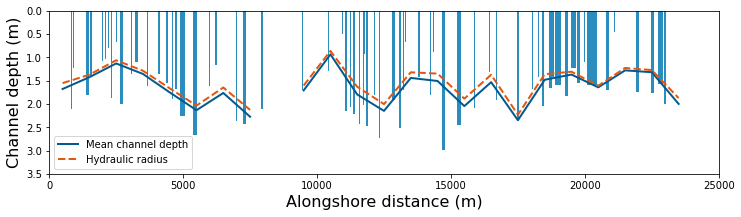

In [9]:
ia = np.where(channel_area>=5.)

binw = 1000.
bins = np.arange(0.,25001.,binw)
print('Bin edges: ',bins)

bin_ctr = bins[0:-1]+0.5*binw
data = channel_avg_depth[ia]
digitized = np.digitize( xchan[ia], bins)
bin_mean = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std = [data[digitized == i].std() for i in range(1, len(bins))]
#bin_mean = np.nan_to_num(bin_mean)
#bin_std = np.nan_to_num(bin_std)

# hydraulic radius
Rh = channel_area/(2.*channel_avg_depth+channel_width)
stat_summary(Rh[ia],iprint=True)
data= Rh[ia]
Rh_mean = [data[digitized == i].mean() for i in range(1, len(bins))]
Rh_std = [data[digitized == i].std() for i in range(1, len(bins))]
#Rh_mean = np.nan_to_num(Rh_mean)
#Rh_std = np.nan_to_num(Rh_std)

plt.figure(figsize=(12,3))

plt.bar(xchan[ia],channel_avg_depth[ia],width=channel_width[ia],color=blue5[3])
plt.plot(bin_ctr,bin_mean,'-',color=blue5[4],linewidth=2,label='Mean channel depth')
plt.plot(bin_ctr,Rh_mean,'--',color=cols[3],linewidth=2,label='Hydraulic radius')
plt.ylim((3.5,0))
plt.xlabel('Alongshore distance (m)',fontsize=16)
plt.ylabel('Channel depth (m)',fontsize=16)
plt.legend()
plt.xlim((0,25000))
plt.savefig(outdir+'arc_channel_depth_bars.png',bbox_inches='tight', format='png', dpi = 200)

In [10]:
### Estimate flow velocity using open-channel flow formula
depth=channel_avg_depth[ia]

mann=.025
mann_rough = 0.03
mann_smooth = 0.02
Slope = 1./300.
konv=1.
rhow = 1027.
rhos = 2650.
d50 = 0.43e-3 # Ruggerio, S. Core Banks
d90 = 1.e-3
# print("Base case")

# d50 = 0.25e-3 # Ruggerio, S. Core Banks
# d90 = 0.34e-3
# print("Fine Sediment case")

# Slope = 1./400.
# print("Low slope case")

# Slope = 1./200.
# print("High slope case")

#mann = 0.02
# print("Smooth n case")

# mann = 0.03
# print("Rough n case")

print("Mannings n {:.3f}, slope {:.4f}, d50 (mm) {:.3f}, d90 (mm) {}".\
     format(mann, Slope, d50*1000, d90*1000))
s = rhos/rhow
nu = 1.36e-6
print('s: ',s)
g = 9.81
Dstar = (g*(s-1)/nu**2)**(1./3.)*d50 # Soulsby eqn 99
ws = (nu/d50)*(np.sqrt(10.36**2+1.049*Dstar**3)-10.36) # Soulsby eqn 102
wstar = ws/((g*(s-1)/nu**2)**(1./3.))
print('Dstar:',Dstar,'ws:',ws,'wstar: ',wstar)

theta_cr = (0.3/(1.+1.2*Dstar))+0.055*(1.-np.exp(-0.020*Dstar)) # Soulsby eqn 77
tauc = theta_cr*(g*rhow*(s-1)*d50)
print('Tauc =',tauc)

# fric = 0.04 # Fig. 3.3 in Dyer - not used
# Cdf = fric/8.
Cdn =   g*mann**2/(depth**(1./3.))

print("Cdn")
stat_summary(Cdn,iprint=True)
Vel   = (konv/mann)*Rh[ia]**(2./3.)*np.sqrt(Slope)
Vello = (konv/mann_rough)*Rh[ia]**(2./3.)*np.sqrt(Slope)
Velhi = (konv/mann_smooth)*Rh[ia]**(2./3.)*np.sqrt(Slope)

Froude = Vel/np.sqrt(g*depth)
tau0   = Cdn*rhow*Vel**2.


print("Froude from Manning")
stat_summary(Froude,iprint=True)
print("Velocity from Manning")
stat_summary(Vel,iprint=True)
print("Tau0 from Manning")
stat_summary(tau0,iprint=True)

### Estimate bed stress from bottom stress
# These give similar, but slightly higher numbers
# taub = rhow*g*depth*Slope[1]
# Ubar = np.sqrt(taub/(rhow*Cdn))
# print('Ubar from slope')
# stat_summary(Ubar,iprint=True)
# print('Taub from slope')
# stat_summary(taub,iprint=True)

# Van Rijn (Eqn 133)
Ucr = 0.19*d50**0.1*np.log10(4.*depth/d90)
if d50>0.5e-3:
    Ucr = 8.5*d50**0.6*np.log10(4.*depth/d90)
Ubar = Vel
curly = (Ubar-Ucr)/np.sqrt((s-1)*g*d50)
qbvr = 0.005*Ubar*depth*curly**2.4*(d50/depth)**1.2
qsvr = 0.012*Ubar*depth*curly**2.4*(d50/depth)*Dstar**(-.6)

Ubar = Vello
curly = (Ubar-Ucr)/np.sqrt((s-1)*g*d50)
qbvrlo = 0.005*Ubar*depth*curly**2.4*(d50/depth)**1.2
qsvrlo = 0.012*Ubar*depth*curly**2.4*(d50/depth)*Dstar**(-.6)

Ubar = Velhi
curly = (Ubar-Ucr)/np.sqrt((s-1)*g*d50)
qbvrhi = 0.005*Ubar*depth*curly**2.4*(d50/depth)**1.2
qsvrhi = 0.012*Ubar*depth*curly**2.4*(d50/depth)*Dstar**(-.6)

Mannings n 0.025, slope 0.0033, d50 (mm) 0.430, d90 (mm) 1.0
s:  2.5803310613437196
Dstar: 8.734704380597039 ws: 0.05704776349367495 wstar:  2.8083993725959964e-06
Tauc = 0.2392398582172001
Cdn
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 0.005 0.001 0.004 0.008
  d5, d25, d50, d75, d95: 0.005 0.005 0.005 0.006 0.007
Froude from Manning
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 0.748 0.060 0.618 0.858
  d5, d25, d50, d75, d95: 0.627 0.710 0.762 0.792 0.831
Velocity from Manning
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 2.926 0.754 1.313 4.647
  d5, d25, d50, d75, d95: 1.574 2.416 3.023 3.447 4.074
Tau0 from Manning
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 47.964 18.029 14.160 94.393
  d5, d25, d50, d75, d95: 18.487 35.582 49.254 59.695 77.502


[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000. 25000. 26000. 27000. 28000. 29000.
 30000. 31000. 32000. 33000. 34000. 35000. 36000.]
(25,)
(25,) None
Bin edges:  [    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000. 25000.]
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 1.462 0.543 0.429 2.855
  d5, d25, d50, d75, d95: 0.563 1.070 1.497 1.824 2.343


C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_8256\1327019595.py:7: RuntimeWarning: Mean of empty slice.
  bin_mean_vel = [data[digitized == i].mean() for i in range(1, len(bins))]
C:\Users\csherwood\Anaconda3\envs\CRS\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\csherwood\Anaconda3\envs\CRS\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\csherwood\Anaconda3\envs\CRS\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\csherwood\Anaconda3\envs\CRS\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\csherwood\AppData\Local\Temp\1\ipyker

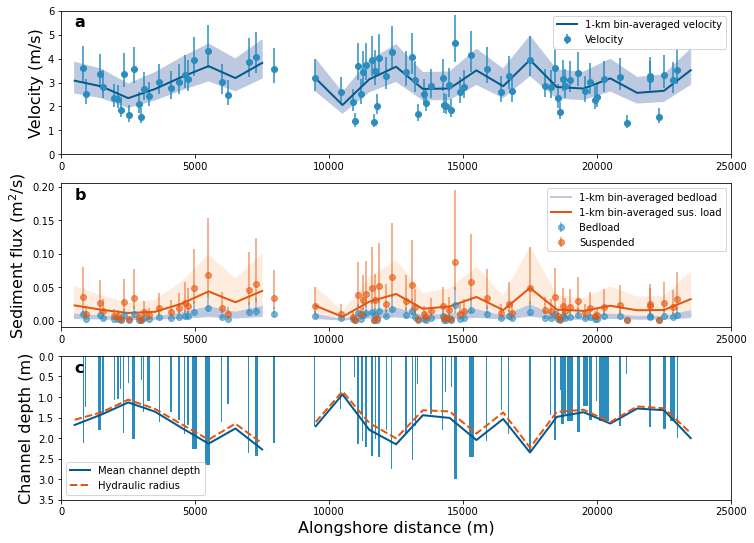

In [11]:
binw = 1000.
bins = np.arange(0.,36001.,binw)
print(bins)
bin_ctr = bins[0:-1]+0.5*binw
data = Vel
digitized = np.digitize(xchan[ia], bins)
bin_mean_vel = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std_vel  = [data[digitized == i].std() for i in range(1, len(bins))]
bin_std_vel[0]=0.
bin_std_vel[1]=0.
bin_std_vel =np.array(bin_std_vel)
data = Vello
bin_mean_vello = [data[digitized == i].mean() for i in range(1, len(bins))]
data = Velhi
bin_mean_velhi = [data[digitized == i].mean() for i in range(1, len(bins))]

print(np.shape(bin_mean), print(np.shape(bin_std)))

plt.figure(figsize=(12,9))
ax1=plt.subplot(311)
# plt.plot(channel_ctr[ia],Vel,'.',markersize=12,color=blue5[3])
ax1.errorbar(xchan[ia],Vel,yerr=[Vel-Vello, Velhi-Vel], fmt='o',color=blue5[3],label='Velocity')
plt.plot(bin_ctr,bin_mean_vel,'-',color=blue5[4],linewidth=2,label='1-km bin-averaged velocity')
ax1.fill_between(bin_ctr, (bin_mean_vello), (bin_mean_velhi),color=blue5[1] )
ax1.set_anchor('W')
plt.ylim((0, 6))
plt.text(0.02, 0.92,'a',horizontalalignment='left',verticalalignment='center',transform = ax1.transAxes, fontweight='bold', fontsize=16)
plt.legend()
plt.ylabel('Velocity (m/s)',fontsize=16)
plt.xlim((0,25000))

data = qbvr
bin_mean_qb = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std_qb  = [data[digitized == i].std() for i in range(1, len(bins))]
bin_std_qb[0]=0.
bin_std_qb[1]=0.
bin_std_qb =np.array(bin_std_qb)

data = qbvrlo
bin_mean_qblo = [data[digitized == i].mean() for i in range(1, len(bins))]

data = qbvrhi
bin_mean_qbhi = [data[digitized == i].mean() for i in range(1, len(bins))]

data = qsvr
bin_mean_qs = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std_qs  = [data[digitized == i].std() for i in range(1, len(bins))]
bin_std_qs[0]=0.
bin_std_qs[1]=0.
bin_std_qs =np.array(bin_std_qs)

data = qsvrhi
bin_mean_qshi = [data[digitized == i].mean() for i in range(1, len(bins))]

data = qsvrlo
bin_mean_qslo = [data[digitized == i].mean() for i in range(1, len(bins))]

ax2=plt.subplot(312)
ax2.errorbar(xchan[ia], qbvr, yerr=[qbvr-qbvrlo, qbvrhi-qbvr], fmt='o',color=blue5[3],alpha=0.6,label='Bedload')
ax2.errorbar(xchan[ia], qsvr, yerr=[qsvr-qsvrlo, qsvrhi-qsvr], fmt='o',color=cols[3],alpha=0.6,label='Suspended')
ax2.plot(bin_ctr,bin_mean_qb,'-',color=blue5[2],linewidth=2,label='1-km bin-averaged bedload')
ax2.fill_between(bin_ctr, (bin_mean_qblo), (bin_mean_qbhi),color=blue5[2] )
ax2.plot(bin_ctr,bin_mean_qs,'-',color=cols[3],linewidth=2,label='1-km bin-averaged sus. load')
ax2.fill_between(bin_ctr, (bin_mean_qslo), (bin_mean_qshi),color=cols[0] )
ax2.set_anchor('W')

plt.legend()
#plt.ylim((0, 5))
plt.text(0.02, 0.92,'b',horizontalalignment='left',verticalalignment='center',transform = ax2.transAxes, fontweight='bold',fontsize=16)
plt.ylabel('Sediment flux (m$^2$/s)',fontsize=16)
plt.xlim((0,25000))

ax3 = plt.subplot(313)
binw = 1000.
bins = np.arange(0.,25001.,binw)
print('Bin edges: ',bins)

bin_ctr = bins[0:-1]+0.5*binw
data = channel_avg_depth[ia]
digitized = np.digitize( xchan[ia], bins)
bin_mean = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std = [data[digitized == i].std() for i in range(1, len(bins))]

# hydraulic radius
Rh = channel_area/(2.*channel_avg_depth+channel_width)
stat_summary(Rh[ia],iprint=True)
data= Rh[ia]
Rh_mean = [data[digitized == i].mean() for i in range(1, len(bins))]
Rh_std = [data[digitized == i].std() for i in range(1, len(bins))]


plt.bar(xchan[ia],channel_avg_depth[ia],width=channel_width[ia],color=blue5[3])
plt.plot(bin_ctr,bin_mean,'-',color=blue5[4],linewidth=2,label='Mean channel depth')
plt.plot(bin_ctr,Rh_mean,'--',color=cols[3],linewidth=2,label='Hydraulic radius')
plt.ylim((3.5,0))
plt.text(0.02, 0.92,'c',horizontalalignment='left',verticalalignment='center',transform = ax3.transAxes, fontweight='bold', fontsize=16)
plt.xlabel('Alongshore distance (m)',fontsize=16)
plt.ylabel('Channel depth (m)',fontsize=16)
plt.legend()
plt.xlim((0,25000))

plt.savefig(outdir+'arc_velocity_sed_transport_island.svg',bbox_inches='tight', format='svg', dpi = 200)